# 회귀나무(Decision Tree Regressor)

- [회귀 나무](https://scikit-learn.org/stable/modules/tree.html#)
  - 출력변수가 연속형일 때의 의사결정 나무
  - 지니 불순도에 대응되는 개념으로 분산(Variance)을 사용하여 노드를 분할함
  - 신규 데이터에 대한 예측은 끝 노드에 도달하고 해당 노드(영역)에 속하는 학습데이터들의 평균값으로 함
  - 분할된 영역에 클래스 데이터가 최대한 많이 존재하도록 각 축으로 영역을 분할하여 생성


### 1. 데이터 로드 및 전처리

In [1]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib
#한글꺠짐 방지
# matplotlib.rcParams['font.family'] ='Malgun Gothic'
# matplotlib.rcParams['axes.unicode_minus'] =False

In [5]:
# 데이터 로드
URL = "/content/drive/MyDrive/SIL/WORK/DSS 머신러닝2/" # 데이터 경로 설정
data=pd.read_csv(URL+"data/Fault_data.csv",encoding="EUC-KR")

data

자재구분     END_DATE_TIME    Y  CHAMBER  TAE.STDDEV0  TAE.MEAN0  TAE.RANGE0  \
0       1  2017-09-25 16:18   69        4     0.044554  38.083127    0.254154   
1       2  2017-09-25 16:13   28        2     0.034801  38.052395    0.063538   
2       3  2017-09-25 16:15   13        3     0.030089  38.046407    0.127080   
3       4  2017-09-25 16:10  101        4     0.047904  38.090810    0.190617   
4       5   2017-10-05 3:48  319        3     0.036058  38.023829    0.190617   
..    ...               ...  ...      ...          ...        ...         ...   
134   135  2018-01-25 13:18   27        3     0.027780  38.064804    0.063536   
135   136  2018-01-25 13:10   23        3     0.033961  38.077084    0.063536   
136   137  2018-01-25 13:13   56        3     0.031002  38.068007    0.063536   
137   138  2018-01-25 13:15   78        2     0.031002  38.068007    0.063536   
138   139  2018-01-25 13:22   25        3     0.033239  38.062561    0.127077   

     PC.STDDEV0  PC.MEAN0  PC.RANGE0  ...  TAE.STDDEV9  TAE.MEAN9  TAE.RANGE9  \
0      0.124753  0.044329   0.439883  ...     0.032832  35.011650    0.127077   
1      0.177575  0.342131   0.439883  ...     0.020858  35.550245    0.063540   
2      0.137559  0.063983   0.488759  ...     0.021635  36.013373    0.063538   
3      1.441465  0.503421   6.549365  ...     0.025405  35.020727    0.127077   
4      0.116419  0.045446   0.391007  ...     0.076083  33.967311    0.317697   
..          ...       ...        ...  ...          ...        ...         ...   
134    0.306206  0.342131   1.124145  ...     0.025479  36.533647    0.127079   
135    0.163848  0.502723   0.488759  ...     0.033529  36.548598    0.127079   
136    0.177190  0.481776   0.537634  ...     0.026805  36.535092    0.127079   
137    0.170316  0.349113   0.439883  ...     0.038289  36.022728    0.127080   
138    0.300832  0.288368   1.173021  ...     0.027395  36.532401    0.127079   

     CROT.STDDEV9  CROT.MEAN9  CROT.RANGE9  PC.STDDEV9   PC.MEAN9  PC.RANGE9  \
0               0          35            0    0.405343  45.124841   3.079182   
1               0          27            0    1.923012  45.350277  15.004887   
2               0          15            0    0.161640  45.071393   0.977516   
3               0          35            0    0.359273  45.110758   2.688171   
4               0          58            0    0.447676  45.147192   3.225808   
..            ...         ...          ...         ...        ...        ...   
134             0          65            0    0.325076  45.069147   3.176930   
135             0          64            0    0.668920  45.131644   5.180838   
136             0          64            0    0.613599  44.972303   4.985336   
137             0          22            0    1.382720  45.285845  10.801564   
138             0          65            0    0.290338  45.039501   2.492668   

     PC.RANGE11.1  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN  
..            ...  
134      3.176930  
135      5.180838  
136      4.985336  
137     10.801564  
138      2.492668  

[139 rows x 140 columns]

In [6]:
data.drop(["자재구분","END_DATE_TIME"],axis=1,inplace=True)
data.head(10)

Y  CHAMBER  TAE.STDDEV0  TAE.MEAN0  TAE.RANGE0  PC.STDDEV0  PC.MEAN0  \
0   69        4     0.044554  38.083127    0.254154    0.124753  0.044329   
1   28        2     0.034801  38.052395    0.063538    0.177575  0.342131   
2   13        3     0.030089  38.046407    0.127080    0.137559  0.063983   
3  101        4     0.047904  38.090810    0.190617    1.441465  0.503421   
4  319        3     0.036058  38.023829    0.190617    0.116419  0.045446   
5  253        4     0.060228  38.091388    0.317692    0.125784  0.045543   
6   83        2     0.038259  38.074132    0.127079    0.200408  0.126048   
7  247        3     0.033703  38.019258    0.127077    0.098248  0.029326   
8  217        4     0.043730  38.118901    0.190617    0.169682  0.095179   
9  288        4     0.064277  38.105524    0.254155    3.861616  1.152441   

   PC.RANGE0  CROT.STDDEV0  CROT.MEAN0  ...  TAE.STDDEV9  TAE.MEAN9  \
0   0.439883             0          35  ...     0.032832  35.011650   
1   0.439883             0          27  ...     0.020858  35.550245   
2   0.488759             0          15  ...     0.021635  36.013373   
3   6.549365             0          35  ...     0.025405  35.020727   
4   0.391007             0          58  ...     0.076083  33.967311   
5   0.439883             0          84  ...     0.026076  34.520470   
6   0.488759             0          75  ...     0.023931  35.553210   
7   0.391007             0          59  ...     0.087642  33.974805   
8   0.439883             0          84  ...     0.034189  34.532918   
9  17.008799             0          84  ...     0.028728  34.524807   

   TAE.RANGE9  CROT.STDDEV9  CROT.MEAN9  CROT.RANGE9  PC.STDDEV9   PC.MEAN9  \
0    0.127077             0          35            0    0.405343  45.124841   
1    0.063540             0          27            0    1.923012  45.350277   
2    0.063538             0          15            0    0.161640  45.071393   
3    0.127077             0          35            0    0.359273  45.110758   
4    0.317697             0          58            0    0.447676  45.147192   
5    0.063537             0          84            0    0.716277  44.936293   
6    0.063540             0          75            0    0.445152  44.974214   
7    0.317697             0          59            0    0.793487  45.201866   
8    0.127075             0          84            0    0.399718  45.151001   
9    0.063537             0          84            0    0.160451  45.082404   

   PC.RANGE9  PC.RANGE11.1  
0   3.079182           NaN  
1  15.004887           NaN  
2   0.977516           NaN  
3   2.688171           NaN  
4   3.225808           NaN  
5   5.571845           NaN  
6   3.763440           NaN  
7   5.962856           NaN  
8   3.030304           NaN  
9   1.026394           NaN  

[10 rows x 138 columns]

In [8]:
data.isna().sum().sum()

16

In [10]:
data.dropna(axis=1,inplace=True)

In [11]:
#X,Y 분할
Y=data["Y"].copy()
X=data.drop("Y",axis=1)
X.head(10)

CHAMBER  TAE.STDDEV0  TAE.MEAN0  TAE.RANGE0  PC.STDDEV0  PC.MEAN0  \
0        4     0.044554  38.083127    0.254154    0.124753  0.044329   
1        2     0.034801  38.052395    0.063538    0.177575  0.342131   
2        3     0.030089  38.046407    0.127080    0.137559  0.063983   
3        4     0.047904  38.090810    0.190617    1.441465  0.503421   
4        3     0.036058  38.023829    0.190617    0.116419  0.045446   
5        4     0.060228  38.091388    0.317692    0.125784  0.045543   
6        2     0.038259  38.074132    0.127079    0.200408  0.126048   
7        3     0.033703  38.019258    0.127077    0.098248  0.029326   
8        4     0.043730  38.118901    0.190617    0.169682  0.095179   
9        4     0.064277  38.105524    0.254155    3.861616  1.152441   

   PC.RANGE0  CROT.STDDEV0  CROT.MEAN0  CROT.RANGE0  ...  PC.RANGE12  \
0   0.439883             0          35            0  ...   17.350926   
1   0.439883             0          27            0  ...    1.466280   
2   0.488759             0          15            0  ...   13.098728   
3   6.549365             0          35            0  ...   17.790812   
4   0.391007             0          58            0  ...    3.714566   
5   0.439883             0          84            0  ...    4.789832   
6   0.488759             0          75            0  ...   13.880746   
7   0.391007             0          59            0  ...    0.879763   
8   0.439883             0          84            0  ...   16.959920   
9  17.008799             0          84            0  ...    2.541547   

   TAE.STDDEV9  TAE.MEAN9  TAE.RANGE9  CROT.STDDEV9  CROT.MEAN9  CROT.RANGE9  \
0     0.032832  35.011650    0.127077             0          35            0   
1     0.020858  35.550245    0.063540             0          27            0   
2     0.021635  36.013373    0.063538             0          15            0   
3     0.025405  35.020727    0.127077             0          35            0   
4     0.076083  33.967311    0.317697             0          58            0   
5     0.026076  34.520470    0.063537             0          84            0   
6     0.023931  35.553210    0.063540             0          75            0   
7     0.087642  33.974805    0.317697             0          59            0   
8     0.034189  34.532918    0.127075             0          84            0   
9     0.028728  34.524807    0.063537             0          84            0   

   PC.STDDEV9   PC.MEAN9  PC.RANGE9  
0    0.405343  45.124841   3.079182  
1    1.923012  45.350277  15.004887  
2    0.161640  45.071393   0.977516  
3    0.359273  45.110758   2.688171  
4    0.447676  45.147192   3.225808  
5    0.716277  44.936293   5.571845  
6    0.445152  44.974214   3.763440  
7    0.793487  45.201866   5.962856  
8    0.399718  45.151001   3.030304  
9    0.160451  45.082404   1.026394  

[10 rows x 136 columns]

### 2. 평가 지표 함수

In [12]:
# 평가 지표 출력 함수
def print_all_reg(Y_test,pred):
    print("model의 MSE 값은 {:.3f}".format(mean_squared_error(Y_test,pred)))
    print("model의 MAE 값은 {:.3f}".format(mean_absolute_error(Y_test, pred)))
    print("model의 MAPE 값은 {:.3f}".format(mean_absolute_percentage_error(Y_test, pred)))
    print("model의 r2 값은 {:.3f}".format(r2_score(Y_test, pred)))

### 3. 모델 학습 및 예측

[[Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)]  
**sklearn.model_selection.train_test_split**
- **test_size** : float or int, default = 0.25, 정수값일시 test사이즈로 설정하고 싶은 샘플 수 입력
- **train_size** : float or int, default = None
- **random_state** : int, default = None, 랜덤 seed값 설정, 같은 seed 내에선 동일결과 추출
- **shuffle** : bool, default = True, 데이터셋 무작위 추출, 시계열 데이터와 같이 순차적 추출이 필요한 경우엔 Shuffle = False!
- **stratify** : array-like, default = None, True일시 계층적 샘플링 진행 ([참고](https://www.investopedia.com/terms/stratified_random_sampling.asp))

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=3,shuffle =True)

[[DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)]  

**사전 가지치기**   
: 나무가 완성(Full Tree)되기 전에 특정조건을 만족하는 경우 알고리즘을 중단하는 방법. 하이퍼파라미터로 손쉽게 설정 가능
      
**주요 하이퍼파라미터**  

- **max_depth** : int, default = None, 트리의 최대깊이를 설정. 값이 클수록 모델의 복잡도가 올라간다.
- **min_samples_split** : int or float, default = 2, 자식노드를 분할하는데 필요한 최소 샘플의 수
- **min_samples_leaf** : leaf node에서 필요한 최소 샘풀수이며, 너무 적을 시 과적합 발생
- **max_leaf_nodes** : int, default=None, 최대 leaf node 수 제한

In [17]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ParameterGrid
# 원하는 파라미터 설정 (파라미터를 추가하려면 위의 함수에도 추가해줘야함.)
params={
    "max_depth":[4,6,8,10,12,14],
    "min_samples_leaf" : [2, 4, 6,10],
    "min_samples_split" : range(2,8,2),
    "max_leaf_nodes": [5,10,15,20]
}

# ParameterGrid 통해서 모든 경우의 수 만들기
params_list = list(ParameterGrid(params)) # 6x4x3x4 = 총 288개의 경우의수를 담은 리스트 반환

# grid search 진행
score_list = []
for params2 in params_list:
    model_use = DecisionTreeRegressor(random_state = 0,max_depth = params2["max_depth"],min_samples_leaf = params2["min_samples_leaf"],
                                   min_samples_split = params2["min_samples_split"],max_leaf_nodes = params2["max_leaf_nodes"]
                                  )
    model_use.fit(X_train, Y_train)
    valid_pred = model_use.predict(X_test)
    tem = mean_squared_error(valid_pred,Y_test)
    score_list.append(tem)

# BEST SCORE 계산
best_index= np.argmin(score_list)
print("BEST SCORE", score_list[best_index])
print("BEST PARAMS", params_list[best_index])

BEST SCORE 2051.2714481649473
BEST PARAMS {'max_depth': 6, 'max_leaf_nodes': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [15]:
# best case의 하이퍼파라미터로 의사결정나무 학습

model_use = DecisionTreeRegressor(random_state = 0,max_depth = params_list[best_index]["max_depth"],min_samples_leaf = params_list[best_index]["min_samples_leaf"],
                                   min_samples_split = params_list[best_index]["min_samples_split"],max_leaf_nodes = params_list[best_index]["max_leaf_nodes"]
                                  )
model_use.fit(X_train, Y_train)
pred_train = model_use.predict(X_train)
pred_test = model_use.predict(X_test)
tem = mean_squared_error(Y_test,pred_test)
print(tem)

#출력
print("Train 데이터 성능")
print_all_reg(Y_train,pred_train)
print(" ")
print("TEST 데이터 성능")
print_all_reg(Y_test,pred_test)


3144.0509708270733
Train 데이터 성능
model의 MSE 값은 1891.915
model의 MAE 값은 26.063
model의 MAPE 값은 0.495
model의 r2 값은 0.485
 
TEST 데이터 성능
model의 MSE 값은 3144.051
model의 MAE 값은 35.296
model의 MAPE 값은 0.929
model의 r2 값은 0.334


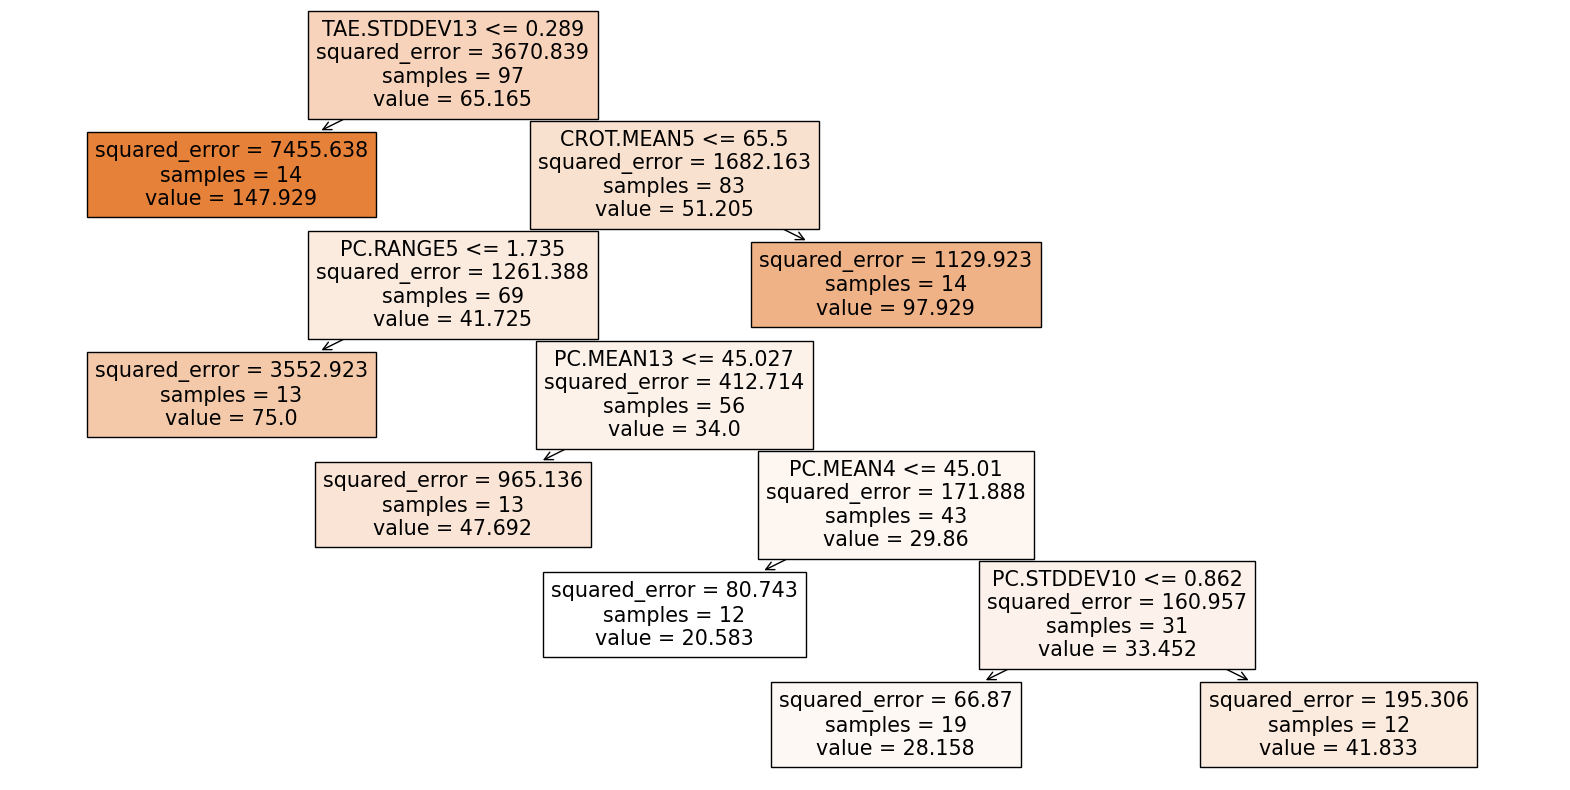

In [16]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# 트리 시각화
plt.figure(figsize=(20,10))
plot_tree(model_use, filled=True, feature_names=X.columns)
plt.show()